# EDA Germany 

In [163]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime

In [164]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [165]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370589 entries, 0 to 1370588
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1370589 non-null  object        
 1   train                  1210176 non-null  object        
 2   path                   1241603 non-null  object        
 3   eva_nr                 1370589 non-null  int64         
 4   category               1370589 non-null  int64         
 5   name                   1370589 non-null  object        
 6   state                  1370589 non-null  object        
 7   city                   1370589 non-null  object        
 8   zip                    1370589 non-null  int64         
 9   long                   1370589 non-null  float64       
 10  lat                    1370589 non-null  float64       
 11  arrival_plan           1241603 non-null  datetime64[ns]
 12  departure_plan         12487

In [167]:
df.describe()

,eva_nr,category,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m
count,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1.370589e+06,1241603,1248748,1067865,1045300,1.370589e+06,1.370589e+06
mean,8.017032e+06,3.738845e+00,4.667255e+04,1.014320e+01,5.087310e+01,2024-06-25 16:20:06.911581696,2024-06-25 16:21:24.361888512,2024-06-25 16:11:24.524448512,2024-06-25 16:12:13.833177600,1.674416e+00,1.532929e+00
min,8.000001e+06,1.000000e+00,1.067000e+03,6.070715e+00,4.741103e+01,2024-06-23 12:46:00,2024-06-23 13:00:00,2024-06-23 12:46:00,2024-06-23 13:00:00,0.000000e+00,0.000000e+00
25%,8.000962e+06,3.000000e+00,2.009700e+04,8.468921e+00,4.934955e+01,2024-06-24 13:59:00,2024-06-24 14:00:00,2024-06-24 13:54:00,2024-06-24 13:54:00,0.000000e+00,0.000000e+00
50%,8.004112e+06,4.000000e+00,4.726900e+04,9.910778e+00,5.105617e+01,2024-06-25 16:51:00,2024-06-25 16:49:00,2024-06-25 16:43:00,2024-06-25 16:42:00,0.000000e+00,0.000000e+00
75%,8.010134e+06,5.000000e+00,7.103400e+04,1.198709e+01,5.247097e+01,2024-06-26 16:29:00,2024-06-26 16:29:00,2024-06-26 16:15:00,2024-06-26 16:14:00,1.000000e+00,1.000000e+00
max,8.098360e+06,5.000000e+00,9.997400e+04,1.497908e+01,5.490684e+01,2024-06-27 15:59:00,2024-06-27 16:29:00,2024-06-27 17:09:00,2024-06-27 17:08:00,3.920000e+02,3.960000e+02
std,3.081238e+04,1.124022e+00,2.818814e+04,2.258215e+00,1.787852e+00,NaN,NaN,NaN,NaN,5.483013e+00,5.161999e+00


In [168]:
df.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:01:00,2024-06-23 13:02:00,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,on_time,on_time,13:01:00,2024-06-23
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:00:00,2024-06-23 13:01:00,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,on_time,on_time,13:00:00,2024-06-23
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:37:00,NaT,NaT,0,0,on_time,on_time,NaT,NaT
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:37:00,NaT,NaT,0,0,on_time,on_time,NaT,NaT
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:18:00,NaT,2024-06-23 13:18:00,0,0,on_time,on_time,NaT,NaT


# Temporal analysis

to be done

# Geographical analysis
## Heatmap

In [169]:
heatmap_df = df.groupby("name", as_index=False ).mean(numeric_only=True)

In [170]:
fig = px.density_mapbox(heatmap_df,
                        lat='lat', lon='long', z='arrival_delay_m',
                        hover_name='name',
                        radius=10,
                        center=dict(lat=0, lon=180), zoom=10,
                        range_color=[0, heatmap_df.arrival_delay_m.max()]
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
    mapbox_zoom=5,
    width=700,
    height=800
)
fig.show()

In [171]:
fig = px.density_mapbox(heatmap_df,
                        lat='lat', lon='long', z='departure_delay_m',
                        hover_name='name',
                        radius=10,
                        center=dict(lat=0, lon=180), zoom=10,
                        range_color=[0, heatmap_df.arrival_delay_m.max()]
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
    mapbox_zoom=5,
    width=700,
    height=800
)
fig.show()

# Creating columns for arrival and departure analysis

In [172]:
df_state_count_delay = df[df["arrival_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count_delay.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,16939,12845,16939,16939,16939,16939,16939,16939,16939,...,16939,14791,16939,14743,16939,16939,16939,16939,16939,16939
1,Bayern,17627,13662,17627,17627,17627,17627,17627,17627,17627,...,17627,15663,17627,15641,17627,17627,17627,17627,17627,17627
2,Berlin,3919,2944,3919,3919,3919,3919,3919,3919,3919,...,3919,3594,3919,3589,3919,3919,3919,3919,3919,3919
3,Brandenburg,1604,1139,1604,1604,1604,1604,1604,1604,1604,...,1604,1310,1604,1309,1604,1604,1604,1604,1604,1604
4,Bremen,396,147,396,396,396,396,396,396,396,...,396,274,396,274,396,396,396,396,396,396


In [173]:
df_state_count_delay2 = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count_delay.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,16939,12845,16939,16939,16939,16939,16939,16939,16939,...,16939,14791,16939,14743,16939,16939,16939,16939,16939,16939
1,Bayern,17627,13662,17627,17627,17627,17627,17627,17627,17627,...,17627,15663,17627,15641,17627,17627,17627,17627,17627,17627
2,Berlin,3919,2944,3919,3919,3919,3919,3919,3919,3919,...,3919,3594,3919,3589,3919,3919,3919,3919,3919,3919
3,Brandenburg,1604,1139,1604,1604,1604,1604,1604,1604,1604,...,1604,1310,1604,1309,1604,1604,1604,1604,1604,1604
4,Bremen,396,147,396,396,396,396,396,396,396,...,396,274,396,274,396,396,396,396,396,396


In [174]:
df_state_count = df.groupby("state", as_index=False).count()
df_state_count.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,177647,153345,157911,177647,177647,177647,177647,177647,177647,...,157911,158858,143448,140745,177647,177647,177647,177647,157911,157911
1,Bayern,214624,191009,194792,214624,214624,214624,214624,214624,214624,...,194792,195904,181712,179565,214624,214624,214624,214624,194792,194792
2,Berlin,207731,197424,200228,207731,207731,207731,207731,207731,207731,...,200228,200341,154230,150437,207731,207731,207731,207731,200228,200228
3,Brandenburg,40812,34283,34469,40812,40812,40812,40812,40812,40812,...,34469,35112,29417,27621,40812,40812,40812,40812,34469,34469
4,Bremen,7702,6123,6418,7702,7702,7702,7702,7702,7702,...,6418,6442,3101,3103,7702,7702,7702,7702,6418,6418


In [175]:
df_state_sum = df.groupby("state", as_index=False).sum("arrival_delay_m")
df_state_sum.head()


,state,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m
0,Baden-Württemberg,1421704384587,647114,13155882525,1.589690e+06,8.656511e+06,352916,328512
1,Bayern,1717636109148,791196,18345242148,2.435418e+06,1.041716e+07,433104,396724
2,Berlin,1678865503551,809820,2471185393,2.782385e+06,1.090706e+07,106415,97380
3,Brandenburg,327859770803,163979,563859911,5.483243e+05,2.138132e+06,35689,32383
4,Bremen,61621610249,28750,217869014,6.733004e+04,4.095726e+05,9074,7046


## Merging Dataframes

In [176]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay[["state","arrival_delay_check"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

## Calculating new rows

In [177]:
df_state["arrival_plan%"] = (df_state["arrival_plan"] / df_state["arrival_plan"].sum()) * 100
df_state["arr_delay_amount_%"] = (df_state["arrival_delay_m"] / df_state["arrival_delay_m"].sum()) * 100
df_state["delay/arrival"] = (df_state["arrival_delay_m"] / df_state["arrival_plan"])
df_state["delay_cnt/arrival"] = (df_state["arrival_delay_check"] / df_state["arrival_plan"]) *100

In [178]:
df_state["departure_plan%"] = (df_state["departure_plan"] / df_state["departure_plan"].sum()) * 100
df_state["dep_delay_amount_%"] = (df_state["departure_delay_m"] / df_state["departure_delay_m"].sum()) * 100
df_state["delay/departure"] = (df_state["departure_delay_m"] / df_state["departure_plan"])
df_state["delay_cnt/departure"] = (df_state["departure_delay_check"] / df_state["departure_plan"]) *100

In [179]:
df_state.head()

,state,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m,arrival_plan,departure_plan,arrival_delay_check,departure_delay_check,arrival_plan%,arr_delay_amount_%,delay/arrival,delay_cnt/arrival,departure_plan%,dep_delay_amount_%,delay/departure,delay_cnt/departure
0,Baden-Württemberg,1421704384587,647114,13155882525,1.589690e+06,8.656511e+06,352916,328512,157911,158858,16939,15305,12.718317,15.378032,2.234904,10.726928,12.721382,15.635864,2.067960,9.634390
1,Bayern,1717636109148,791196,18345242148,2.435418e+06,1.041716e+07,433104,396724,194792,195904,17627,15296,15.688751,18.872160,2.223418,9.049140,15.688033,18.882484,2.025094,7.807906
2,Berlin,1678865503551,809820,2471185393,2.782385e+06,1.090706e+07,106415,97380,200228,200341,3919,3521,16.126572,4.636948,0.531469,1.957269,16.043349,4.634900,0.486071,1.757503
3,Brandenburg,327859770803,163979,563859911,5.483243e+05,2.138132e+06,35689,32383,34469,35112,1604,1352,2.776169,1.555120,1.035394,4.653457,2.811776,1.541302,0.922277,3.850535
4,Bremen,61621610249,28750,217869014,6.733004e+04,4.095726e+05,9074,7046,6418,6442,396,257,0.516912,0.395392,1.413836,6.170146,0.515877,0.335362,1.093760,3.989444


# Side by Side comparison

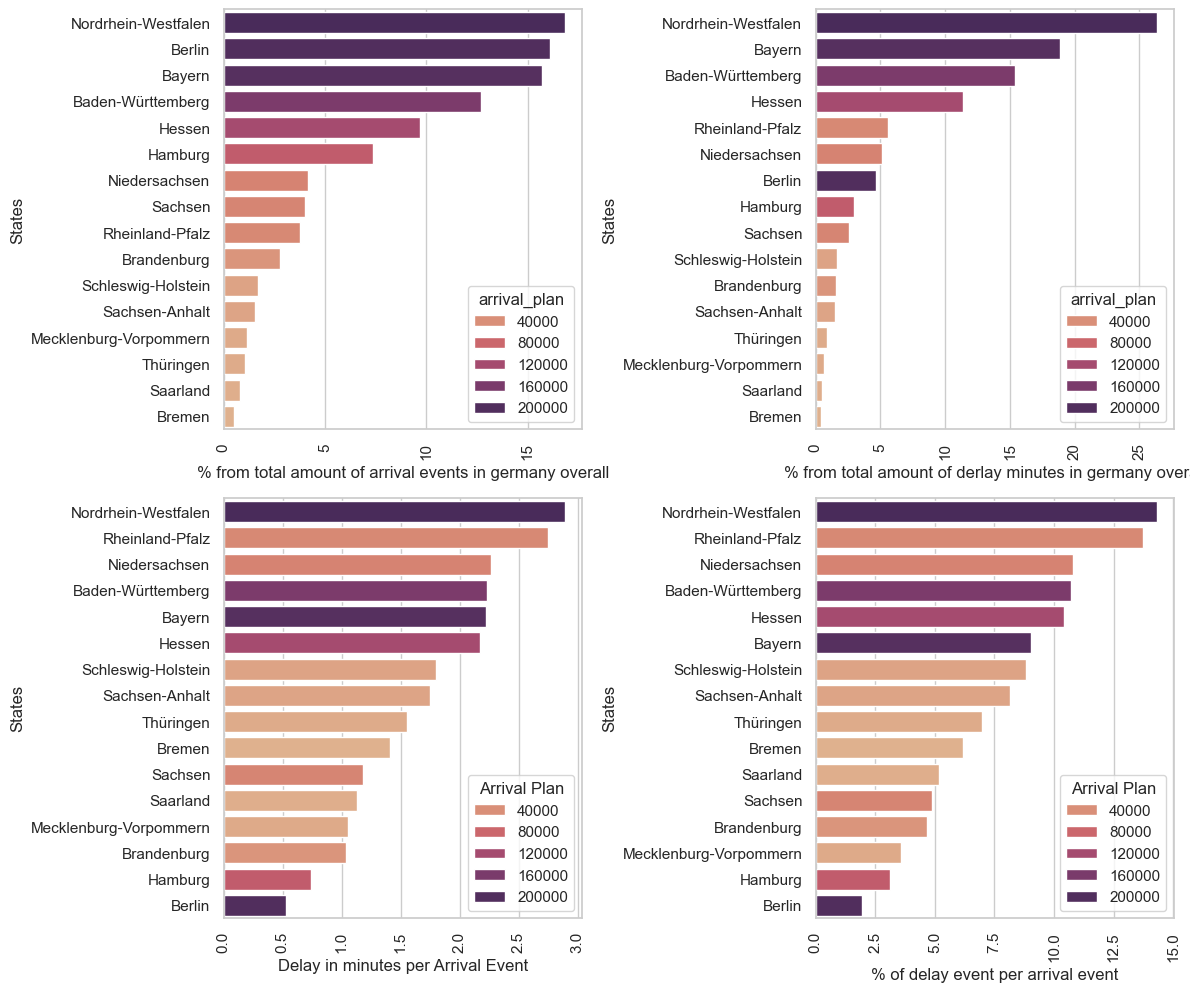

In [181]:
# Define the figure and the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 1 row, 3 columns, each plot with a size of 8x6 inches

# Set the theme for all plots
sns.set_theme(style="whitegrid")

# First bar plot
sns.barplot(data=df_state.sort_values(by="arrival_plan%", ascending=False), x="arrival_plan%", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[0,0])
axes[0,0].set_xlabel("% from total amount of arrival events in germany overall")
axes[0,0].set_ylabel("States")
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].legend(title="arrival_plan")

# Second bar plot
sns.barplot(data=df_state.sort_values(by="arr_delay_amount_%", ascending=False), x="arr_delay_amount_%", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[0,1])
axes[0,1].set_xlabel("% from total amount of derlay minutes in germany overall")
axes[0,1].set_ylabel("States")
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].legend(title="arrival_plan")

# Third bar plot
sns.barplot(data=df_state.sort_values(by="delay/arrival", ascending=False), y="state", x="delay/arrival", 
            palette="flare", orient="h", hue="arrival_plan", ax=axes[1,0])
axes[1,0].set_xlabel("Delay in minutes per Arrival Event")
axes[1,0].set_ylabel("States")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].legend(title="Arrival Plan")

sns.barplot(data=df_state.sort_values(by="delay_cnt/arrival", ascending=False), y="state", x="delay_cnt/arrival", 
            palette="flare", orient="h", hue="arrival_plan", ax=axes[1,1])
axes[1,1].set_xlabel("% of delay event per arrival event")
axes[1,1].set_ylabel("States")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(title="Arrival Plan")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
# Define the figure and the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 1 row, 3 columns, each plot with a size of 8x6 inches

# Set the theme for all plots
sns.set_theme(style="whitegrid")

# First bar plot
sns.barplot(data=df_state.sort_values(by="departure_plan%", ascending=False), x="departure_plan%", y="state", 
            palette="flare", hue="departure_plan", orient="h", ax=axes[0,0])
axes[0,0].set_xlabel("% from total amount of departure events in germany overall")
axes[0,0].set_ylabel("States")
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].legend(title="departure_plan")

# Second bar plot
sns.barplot(data=df_state.sort_values(by="dep_delay_amount_%", ascending=False), x="dep_delay_amount_%", y="state", 
            palette="flare", hue="departure_plan", orient="h", ax=axes[0,1])
axes[0,1].set_xlabel("% from total amount of derlay minutes in germany overall")
axes[0,1].set_ylabel("States")
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].legend(title="departure_plan")

# Third bar plot
sns.barplot(data=df_state.sort_values(by="delay/departure", ascending=False), y="state", x="delay/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1,0])
axes[1,0].set_xlabel("Delay in minutes per Arrival Event")
axes[1,0].set_ylabel("States")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].legend(title="Arrival Plan")

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False), y="state", x="delay_cnt/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1,1])
axes[1,1].set_xlabel("% of delay event per departure event")
axes[1,1].set_ylabel("States")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(title="Arrival Plan")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay time to arrival events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are in the lower parts for total amounts of arrival events and therefore not as important to prioritize.

# Details for the most important States
## NRW, BW, Bayern, Hessen